<a href="https://colab.research.google.com/github/CINGOMEZ74/CINGOMEZ74/blob/main/Loan_Approval_Financial_Risk_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Plan

1. Load the data
2. Clean the data
3. Explore the data


## Loan Approval: Financial Risk Analysis Project

Analyzing 20K+ loan applications to find approval patterns

Key Question: Which clients get approved more often?


### Loading and Previewing the Data

##### Dataset - [Financial Risk for Loan Approval](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval)

In [1]:
#Loading relevant libraries and the data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Previewing the top of the dataset

loans_data = pd.read_csv('Loan.csv')
loans_data.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
#Previewing the bottom of the dataset
loans_data.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


### Cleaning the data

In [4]:
#Checking on the datatype
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

1. Application date needs to be changed to data type - datetype


In [5]:
#Checking for missing values
loans_data.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [6]:
#Checking for Duplicates
loans_data.duplicated().sum()

np.int64(0)

In [7]:
# Converting the ApplicationDate column to datetype
loans_data.ApplicationDate = pd.to_datetime(loans_data.ApplicationDate)

In [8]:
#Checking on the data type of various columns
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [9]:
# Columns of interest

# Define the columns you want to keep
columns_ = ['ApplicationDate', 'AnnualIncome', 'CreditScore',
                   'EmploymentStatus', 'LoanAmount', 'SavingsAccountBalance',
                   'TotalAssets', 'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved']

# Create a new DataFrame with only the specified columns
loans = loans_data[columns_]

# Display the first few rows of the new DataFrame
loans.head()

,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1


In [10]:
#Check on Shape
loans.shape

(20000, 11)

### Data Exploration and Visualization

In [11]:
#Checking on the data points of interest
loans.columns


Index(['ApplicationDate', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'LoanAmount', 'SavingsAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved'],
      dtype='object')

##### Applications over Time

In [ ]:
# Extract the year and month from the 'ApplicationDate'
# If you want only approved loans:
loans['Year'] = loans['ApplicationDate'].dt.year
loans['Month'] = loans['ApplicationDate'].dt.to_period('M')



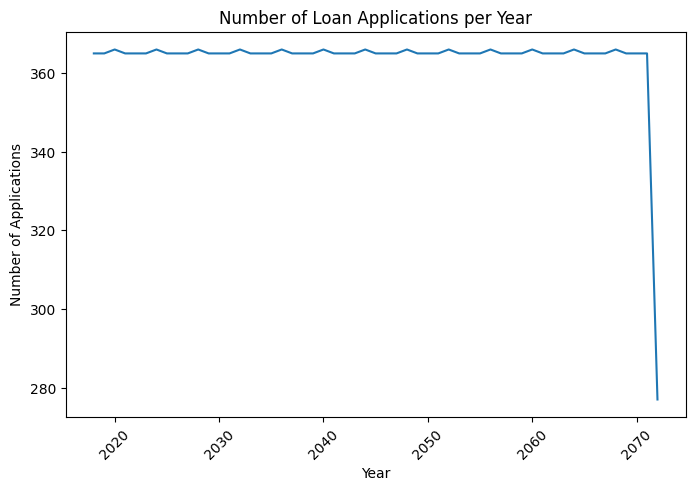

In [13]:
# Group by year and count applications
applications_per_year = loans.groupby('Year').size()

# Plot the line graph for applications per year
plt.figure(figsize=(8, 5))
sb.lineplot(x=applications_per_year.index, y=applications_per_year.values)
plt.title('Number of Loan Applications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()

##### Annual Income

In [14]:
# Split data
approved = loans[loans['LoanApproved'] == 1]
rejected = loans[loans['LoanApproved'] == 0]

# AnnualIncome
print("Approved - AnnualIncome:")
print(approved['AnnualIncome'].describe())
print("\nRejected - AnnualIncome:")
print(rejected['AnnualIncome'].describe())

# LoanAmount
print("\nApproved - LoanAmount:")
print(approved['LoanAmount'].describe())
print("\nRejected - LoanAmount:")
print(rejected['LoanAmount'].describe())


Approved - AnnualIncome:
count      4780.000000
mean     102210.551464
std       50313.413141
min       15787.000000
25%       67380.500000
50%       91269.500000
75%      123959.500000
max      485341.000000
Name: AnnualIncome, dtype: float64

Rejected - AnnualIncome:
count     15220.000000
mean      45641.460907
std       24079.007328
min       15000.000000
25%       28028.750000
50%       40557.500000
75%       57559.000000
max      228805.000000
Name: AnnualIncome, dtype: float64

Approved - LoanAmount:
count     4780.000000
mean     19144.709414
std       8769.867284
min       3674.000000
25%      12774.750000
50%      17336.500000
75%      23712.250000
max      82644.000000
Name: LoanAmount, dtype: float64

Rejected - LoanAmount:
count     15220.000000
mean      26684.996386
std       14113.204058
min        4044.000000
25%       16949.250000
50%       23566.000000
75%       32987.250000
max      184732.000000
Name: LoanAmount, dtype: float64


In [15]:

# Measures of Central Tendency
mean_ai = round(loans['AnnualIncome'].mean(),2)
median_ai = round(loans['AnnualIncome'].median(),2)
mode_ai = round(loans['AnnualIncome'].mode(),2)
percentile_25_ai = round(loans['AnnualIncome'].quantile(0.25),2)
percentile_75_ai = round(loans['AnnualIncome'].quantile(0.75),2)

# Print the results
print('Mean = '+str(mean_ai))
print('Median = '+str(median_ai))
print('Mode = '+str(mode_ai))
print('percentile_25 = '+str(percentile_25_ai))
print('percentile_75 = '+str(percentile_75_ai))


Mean = 59161.47
Median = 48566.0
Mode = 0    15000
Name: AnnualIncome, dtype: int64
percentile_25 = 31679.0
percentile_75 = 74391.0


In [16]:
#Majority of the clients who get their loans approved are at what income level?
# Make loans a real copy first
loans = loans.copy()
# Defining the function that will categorize income levels

def result(AnnualIncome):
  if AnnualIncome <= percentile_25_ai:
    return f'<= {percentile_25_ai}'
  elif AnnualIncome <= mean_ai:
    return f'<= {mean_ai}'
  elif AnnualIncome <= percentile_75_ai:
    return f'<= {percentile_75_ai}'
  else:
    return f'> {percentile_75_ai}'

#Applying the function to our dataset
loans['Income Category'] = loans['AnnualIncome'].apply(result)
loans.head()

,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,Year,Month,Income Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,2018,2018-01,<= 59161.47
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,2018,2018-01,<= 59161.47
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,2018,2018-01,<= 59161.47
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,2018,2018-01,<= 74391.0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,2018,2018-01,> 74391.0


In [17]:
#Select unique Income Category
loans['Income Category'].unique()


array(['<= 59161.47', '<= 74391.0', '> 74391.0', '<= 31679.0'],
      dtype=object)

In [18]:
# Grouping by 'Income Category' and counting the number of people in each category
applicants_by_category = loans.groupby('Income Category').size().sort_values(ascending=False).head()
applicants_by_category


,0
Income Category,
<= 59161.47,7522
<= 31679.0,5000
> 74391.0,5000
<= 74391.0,2478


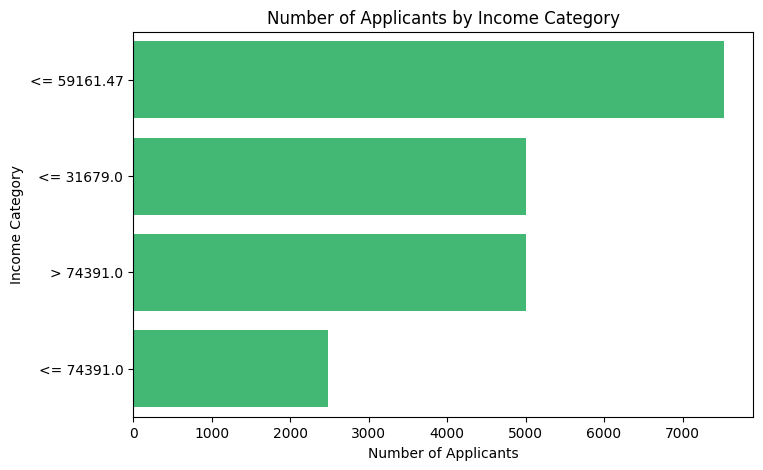

In [19]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
base_color = sb.color_palette()[0]

# Create a bar plot using seaborn
sb.barplot(x=applicants_by_category.values, y=applicants_by_category.index, color='#2ECC71')

# Add labels and title
plt.xlabel('Number of Applicants')
plt.ylabel('Income Category')
plt.title('Number of Applicants by Income Category')

# Show the plot
plt.show()

The majority of the applications are from medium lower earners

In [20]:
# Filter the loans where LoanApproved is 1
# loans_approved = [loans['LoanApproved'] == 1]
loans_approved = loans[loans['LoanApproved'] == 1]
#applicants_by_category = loans_approved.groupby('Income Category').size().sort_values(ascending=False).head()

approvedApplicants_by_category = loans_approved.groupby('Income Category').size().sort_values(ascending=False).head()
print(approvedApplicants_by_category)


Income Category
> 74391.0      3223
<= 59161.47     771
<= 74391.0      734
<= 31679.0       52
dtype: int64


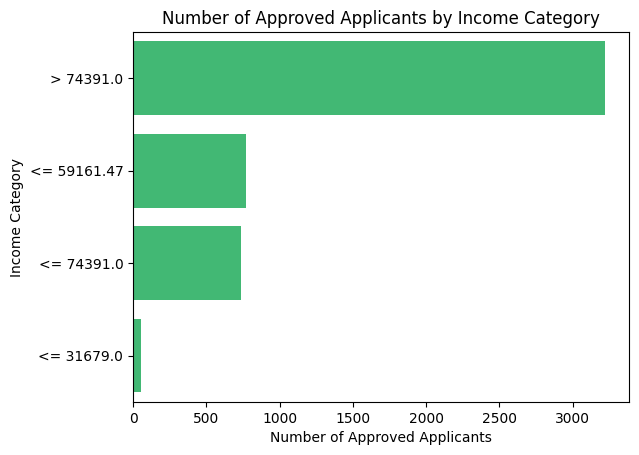

In [21]:
# Create a bar plot using seaborn
sb.barplot(x=approvedApplicants_by_category.values, y=approvedApplicants_by_category.index, color='#2ECC71')

# Add labels and title
plt.xlabel('Number of Approved Applicants')
plt.ylabel('Income Category')
plt.title('Number of Approved Applicants by Income Category')

# Show the plot
plt.show()

The category with the list approved applications, are the lower earners; defined as anyone who earns below USD 31,679 per year.

In [22]:
# Approved Applicants Percentage

approvedApplicants_by_category = (
    loans_approved
        .groupby('Income Category')
        .size()
)

approvedApplicants_pct = (
    approvedApplicants_by_category
    / approvedApplicants_by_category.sum() * 100
)

print(approvedApplicants_pct.sort_values(ascending=False).head())


Income Category
> 74391.0      67.426778
<= 59161.47    16.129707
<= 74391.0     15.355649
<= 31679.0      1.087866
dtype: float64


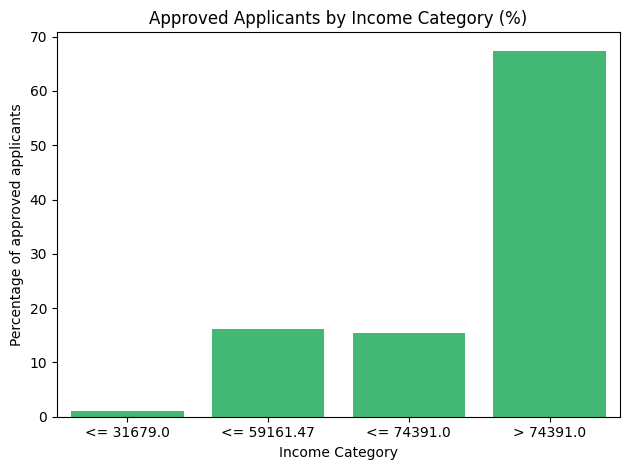

In [23]:

#Create a bar using seaborn
import seaborn as sns

sns.barplot(x=approvedApplicants_pct.index,
            y=approvedApplicants_pct.values, color='#2ECC71')
plt.ylabel('Percentage of approved applicants')
plt.xlabel('Income Category')
plt.title('Approved Applicants by Income Category (%)')
plt.tight_layout()
plt.show()



In [24]:
# Loan Approval % in different categories

for col in ['EmploymentStatus', 'HomeOwnershipStatus']:
    print(f"\nApproved - {col}:")
    print(approved[col].value_counts(normalize=True) * 100)

    print(f"\nRejected - {col}:")
    print(rejected[col].value_counts(normalize=True) * 100)



Approved - EmploymentStatus:
EmploymentStatus
Employed         85.543933
Self-Employed     9.163180
Unemployed        5.292887
Name: proportion, dtype: float64

Rejected - EmploymentStatus:
EmploymentStatus
Employed         85.065703
Unemployed        7.477004
Self-Employed     7.457293
Name: proportion, dtype: float64

Approved - HomeOwnershipStatus:
HomeOwnershipStatus
Mortgage    41.778243
Rent        28.995816
Own         20.502092
Other        8.723849
Name: proportion, dtype: float64

Rejected - HomeOwnershipStatus:
HomeOwnershipStatus
Mortgage    39.040736
Rent        30.886991
Own         19.434954
Other       10.637319
Name: proportion, dtype: float64


Clients with higher annual income and lower loan amounts relative to their income have a higher approval rate.

Approved loans are more common among applicants who are employed full-time and who own or are buying their homes, compared with unemployed or renting applicants.





##  Conclusion



In this dataset, clients with higher annual incomes, requesting comparatively lower loan amounts, who are employed (including self-employed) and are more likely to have a mortgage or own their homes, show a higher probability of loan approval.

In [25]:
print("🚀 KEY FINDINGS - Approved Client Profile")
print("="*50)
print("✅ HIGHER INCOME: $102K vs $45K")
print("✅ SMALLER LOANS: $19K vs $26K")
print("✅ LESS UNEMPLOYED: 5% vs 7%")
print("✅ MORE MORTGAGES: 42% vs 39%")
print("\n💡 Best Profile: High income + moderate loan + employed + homeowner")


🚀 KEY FINDINGS - Approved Client Profile
✅ HIGHER INCOME: $102K vs $45K
✅ SMALLER LOANS: $19K vs $26K
✅ LESS UNEMPLOYED: 5% vs 7%
✅ MORE MORTGAGES: 42% vs 39%

💡 Best Profile: High income + moderate loan + employed + homeowner
